# Practica 2 - Naive Bayes

### Realiza con Python un programa que cumpla con los requisitos que se muestran a continuación. En este ejercicio vamos a entrenar un modelo basado en Naive Bayes para predecir el cáncer de mama con el Breast Cancer Wisconsin (Diagnostic) Data Set.

### Tarea 1: Importación de librerías, carga del dataset en un data frame y muestra inicial.

1.1 Carga el dataset en un dataframe llamado datos.  
1.2 Muestra el dataset.  
1.3 Muestra un resumen estadístico del dataset de forma numérica.  
 

In [60]:
#Importamos las librerias necesarias para el análisis y la descarga del Dataset.
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os
import seaborn as sns


In [61]:
# Descargamos la última versión del dataset e imprimimos la ruta donde se encuentra.
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: C:\Users\Alejandro\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


['data.csv']

In [62]:
#Reproducibilidad del dataset para google colab.
datos = pd.read_csv(os.path.join(path, "data.csv"))
datos.info()
datos.describe()
datos.keys

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<bound method NDFrame.keys of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

1.4 Muestra al menos tres gráficos estadísticos sobre el dataset, elige los que creas más oportunos. 


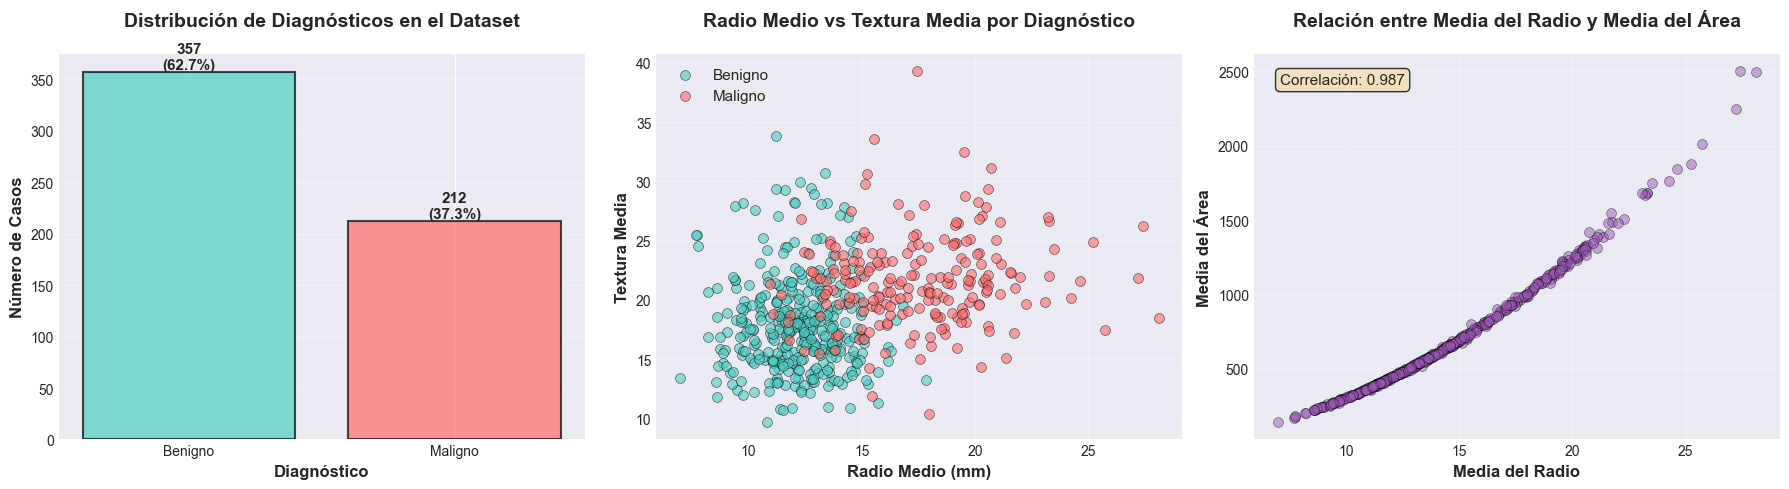

ESTADÍSTICAS DEL DATASET
Total de muestras: 569

Distribución de diagnósticos:
  Benigno (B): 357 (62.74%)
  Maligno (M): 212 (37.26%)

Características analizadas:
  Radio medio: rango [6.98, 28.11]
  Textura media: rango [9.71, 39.28]
  Área media: rango [143.50, 2501.00]

  Correlación Radio-Área: 0.987


In [63]:
# Configurar el estilo de los gráficos
plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# GRÁFICO 1: Distribución de Diagnósticos
diagnosis_counts = datos['diagnosis'].value_counts()

# Mapear M/B a nombres completos
labels = ['Maligno' if idx == 'M' else 'Benigno' for idx in diagnosis_counts.index]
colors = ['#ff6b6b' if idx == 'M' else '#4ecdc4' for idx in diagnosis_counts.index]

bars = ax1.bar(labels, diagnosis_counts.values, color=colors, alpha=0.7, 
               edgecolor='black', linewidth=1.5)

# Añadir etiquetas con valores y porcentajes
total = len(datos)
for bar, count in zip(bars, diagnosis_counts.values):
    height = bar.get_height()
    percentage = (count / total) * 100
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

ax1.set_xlabel('Diagnóstico', fontsize=12, fontweight='bold')
ax1.set_ylabel('Número de Casos', fontsize=12, fontweight='bold')
ax1.set_title('Distribución de Diagnósticos en el Dataset', 
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(axis='y', alpha=0.3)

# GRÁFICO 2: Radio Medio vs Textura Media
malignos = datos[datos['diagnosis'] == 'M']
benignos = datos[datos['diagnosis'] == 'B']

ax2.scatter(benignos['radius_mean'], benignos['texture_mean'], 
           c='#4ecdc4', label='Benigno', alpha=0.6, s=50, 
           edgecolors='black', linewidth=0.5)
ax2.scatter(malignos['radius_mean'], malignos['texture_mean'], 
           c='#ff6b6b', label='Maligno', alpha=0.6, s=50, 
           edgecolors='black', linewidth=0.5)

ax2.set_xlabel('Radio Medio (mm)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Textura Media', fontsize=12, fontweight='bold')
ax2.set_title('Radio Medio vs Textura Media por Diagnóstico', 
              fontsize=14, fontweight='bold', pad=20)
ax2.legend(fontsize=11, loc='upper left')
ax2.grid(alpha=0.3)

# GRÁFICO 3: Relación Radio Medio vs Área Media (Redundancia)
ax3.scatter(datos["radius_mean"], datos["area_mean"], alpha=0.5, 
           c='#9b59b6', edgecolors='black', linewidth=0.5, s=50)
ax3.set_xlabel("Media del Radio", fontsize=12, fontweight='bold')
ax3.set_ylabel("Media del Área", fontsize=12, fontweight='bold')
ax3.set_title("Relación entre Media del Radio y Media del Área", 
             fontsize=14, fontweight='bold', pad=20)
ax3.grid(alpha=0.3)

# Calcular y mostrar correlación
correlation = datos[['radius_mean', 'area_mean']].corr().iloc[0, 1]
ax3.text(0.05, 0.95, f'Correlación: {correlation:.3f}', 
        transform=ax3.transAxes, fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Imprimir estadísticas adicionales
print("=" * 60)
print("ESTADÍSTICAS DEL DATASET")
print("=" * 60)
print(f"Total de muestras: {len(datos)}")
print(f"\nDistribución de diagnósticos:")
for diag, count in diagnosis_counts.items():
    tipo = 'Maligno' if diag == 'M' else 'Benigno'
    print(f"  {tipo} ({diag}): {count} ({(count/total*100):.2f}%)")

print(f"\nCaracterísticas analizadas:")
print(f"  Radio medio: rango [{datos['radius_mean'].min():.2f}, {datos['radius_mean'].max():.2f}]")
print(f"  Textura media: rango [{datos['texture_mean'].min():.2f}, {datos['texture_mean'].max():.2f}]")
print(f"  Área media: rango [{datos['area_mean'].min():.2f}, {datos['area_mean'].max():.2f}]")
print(f"\n  Correlación Radio-Área: {correlation:.3f}")
print("=" * 60)


**Gráfico 1:** Nos muestra que el dataset está relativamente balanceado (aproximadamente 63% benignos vs 37% malignos), lo cual es favorable para entrenar modelos de machine learning sin necesidad de técnicas especiales de balanceo.

**Gráfico 2:** Este gráfico muestra que los tumores malignos (rojo) tienden a concentrarse en la zona de mayor radio y mayor textura. Los tumores benignos (azul/turquesa) generalmente tienen radios más pequeños y texturas más uniformes. Existe cierta superposición, lo que indica que ninguna característica por sí sola es perfectamente discriminativa

**Gráfico 3:** El diagrama de dispersión entre la media del radio y la media del área muestra una fuerte relación lineal positiva, lo que indica una correlación entre ambas variables. Es decir,  la información es redundante y la posible dependencia entre algunas variables, a pesar de que el modelo asume que son independientes

### Tarea 2: Preparación de los datos:

debes crear un nuevo dataframe con los datos preparados, con el nombre breastcancer. El dataframe original datos, no debe modificarse. Los requisitos para los valores de los distintos datos en el nuevo dataframe (tanto atributos como resultado) son los siguientes:  

● No pueden estar vacíos.   
● El campo objetivo (diagnosis), debe contener “M” o “B”, siendo M=Maligno y B=Benigno.  
● Se considera que los siguientes datos no pueden ser igual a cero: radius_mean, perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst, compactness_mean, concavity_mean, concave_points_mean, smoothness_mean, fractal_dimension_mean.  
● No se realizará cálculo de outliers, ni de observaciones influyentes.   

In [64]:
# Realizamos la copia del dataset.
breastcancer = datos.copy()

# Eliminar la columna 'Unnamed' esta columna se ha creado ya que el csv tenía una "," al final de cada registro.)
columms_unnamed = []
for col in breastcancer.columns:
    if 'unnamed' in col.lower():
        columms_unnamed.append(col)

# Hacemos un drop de las columnas dentro de columnas_unnamed
breastcancer = breastcancer.drop(columns=columms_unnamed)

# Eliminar filas con valores (NaN o None)
total_rows = len(breastcancer)
breastcancer = breastcancer.dropna()
rows_del = total_rows - len(breastcancer)
print("=" * 60)
print("Registros eliminados por valores vacíos: " + str(rows_del))
print("Registros restantes: " + str(len(breastcancer)))
print("=" * 60)

# Eliminar rows que tengan valores igual a 0

rows_ne_0 = [
    'radius_mean', 
    'perimeter_mean', 
    'area_mean', 
    'radius_worst', 
    'perimeter_worst', 
    'area_worst',
    'compactness_mean', 
    'concavity_mean', 
    'concave_points_mean', 
    'smoothness_mean', 
    'fractal_dimension_mean'
]

rows_bf = len(breastcancer)

for column in rows_ne_0:
    if column in breastcancer.columns:
        breastcancer = breastcancer[breastcancer[column] != 0]

rows_del = rows_bf - len(breastcancer)
print("Columnas validadas: " + str(len(rows_ne_0)))
print("Registros eliminados por contener ceros: " + str(rows_del))
print("Registros restantes: " + str(len(breastcancer)))
print("=" * 60)


Registros eliminados por valores vacíos: 0
Registros restantes: 569
Columnas validadas: 11
Registros eliminados por contener ceros: 13
Registros restantes: 556


 2.1 Comprueba que todos los datos cumplen los requisitos indicados. Si algún dato no lo cumple, elimina la fila completa.  
 2.2 Modifica o mapea los tipos que creas oportuno.  
2.3 Escala los atributos por el método de estandarización que creas más oportuno. Ten en cuenta el clasificador bayesiano que vayas a usar después.  

In [65]:
#comprobamos si queda algún valor nulo
breastcancer.isnull().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [66]:
breastcancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [67]:
#Vamos a mapear diagnosis para poder trabajar con los modelos.
breastcancer['diagnosis'] = breastcancer['diagnosis'].map({'M': 1, 'B': 0})

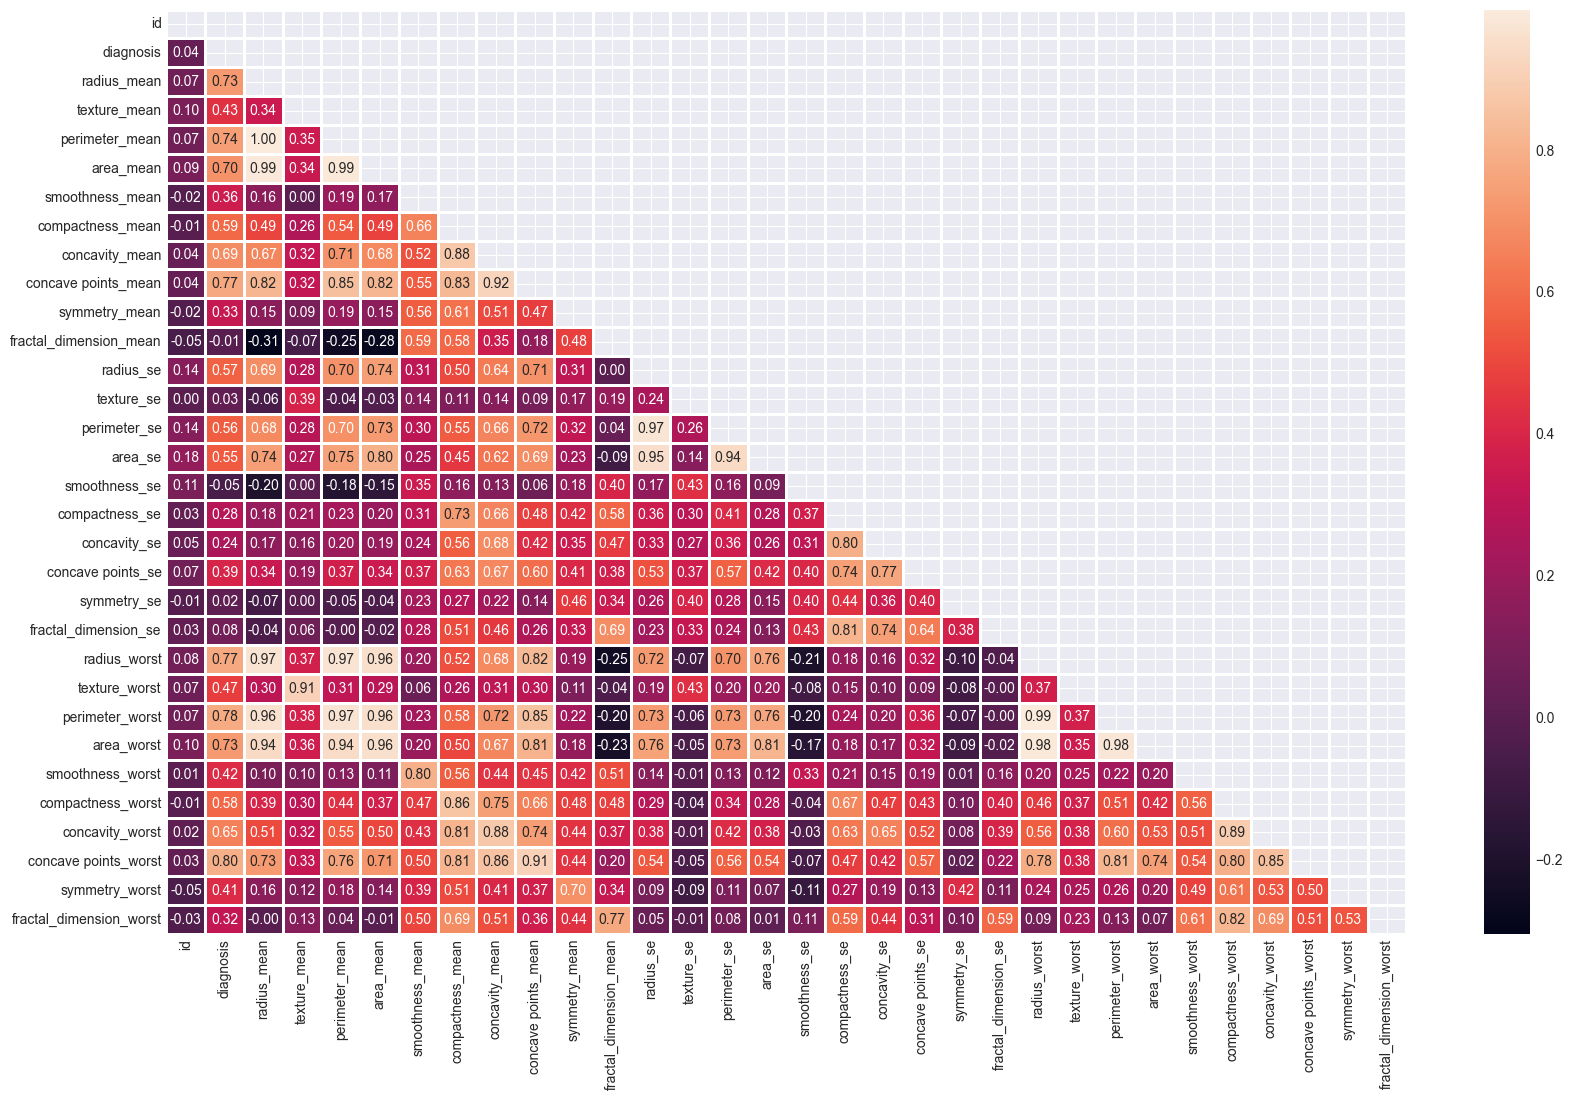

In [68]:
#Creamos un mapa de calor para ver la correlación de pearson entre los atributos y ver si podemos quitar información redundante.
plt.figure(figsize = (20, 12))

corr = breastcancer.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [69]:
corr_matrix = breastcancer.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# Encontrar pares con alta correlación
to_drop = set()
for col in tri_df.columns:
    for idx in tri_df.index:
        if tri_df.loc[idx, col] > 0.92:
            to_drop.add(col)

breastcancer_reduced = breastcancer.drop(list(to_drop), axis=1)
print("Columnas eliminadas: " , str(len(to_drop)))
print("Columnas restantes: " , str(breastcancer_reduced.shape[1]))

Columnas eliminadas:  7
Columnas restantes:  25


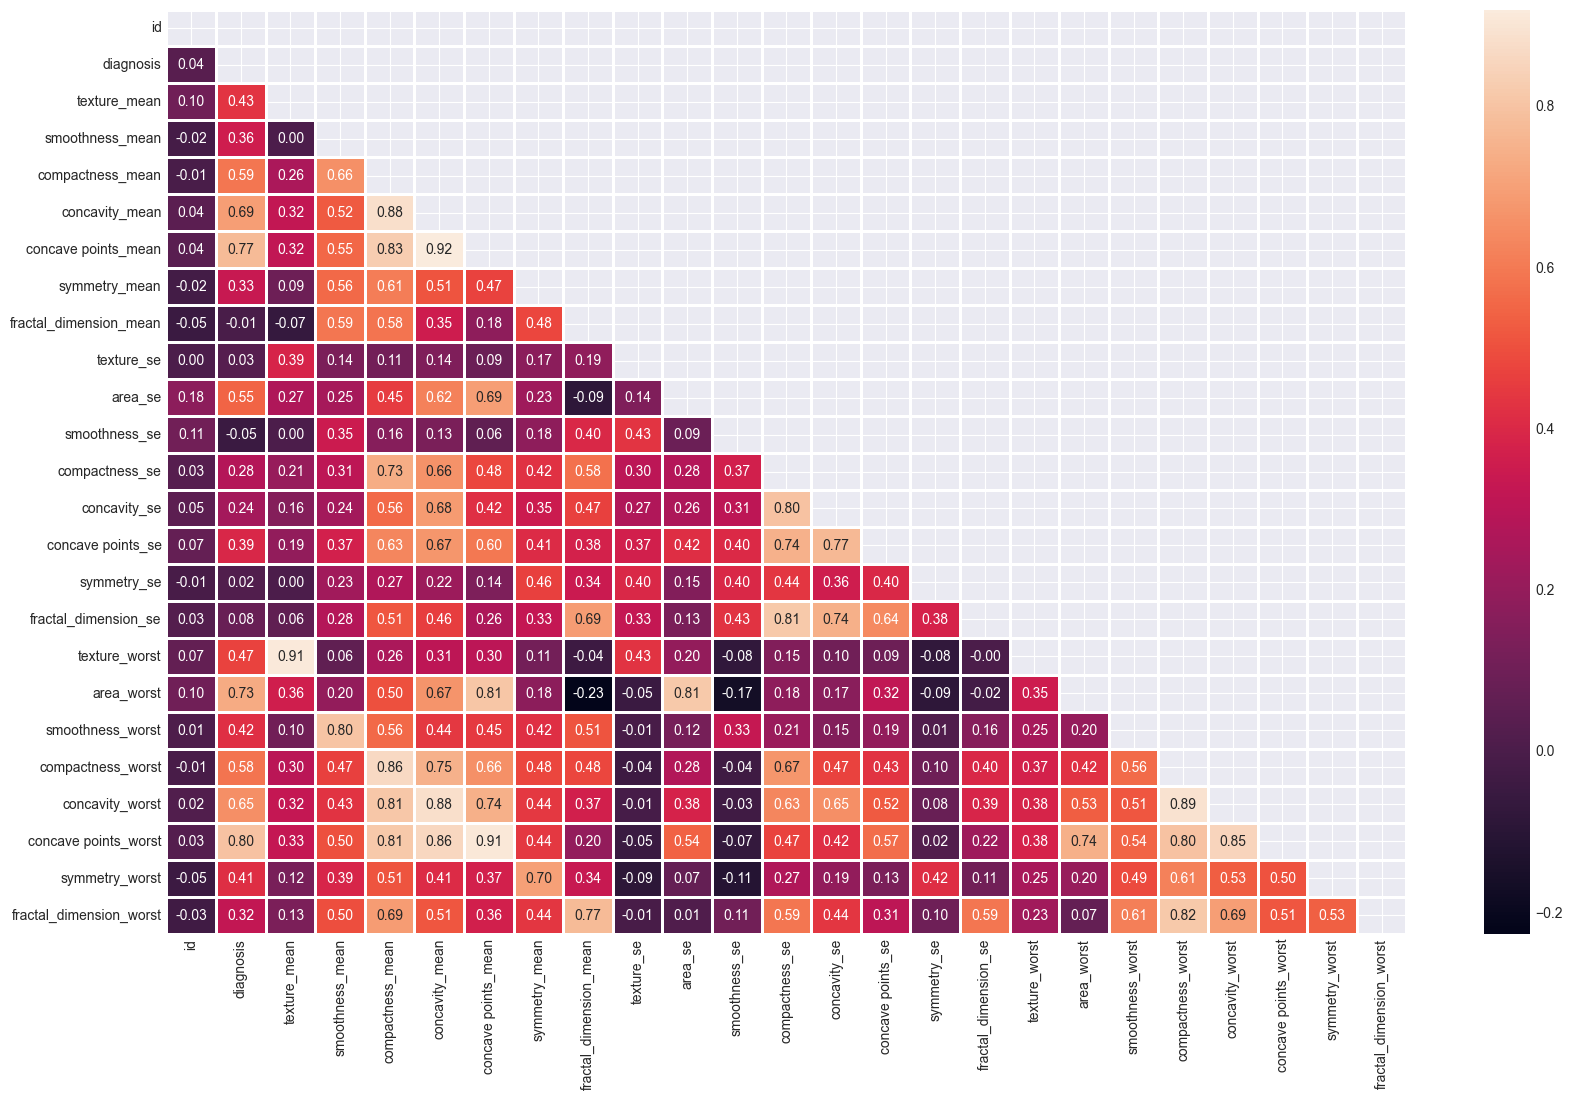

In [70]:
plt.figure(figsize = (20, 12))

corr = breastcancer_reduced.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [71]:
#Escalamiento de los datos.
from sklearn.preprocessing import StandardScaler

# Separar variable objetivo de características
X = breastcancer_reduced.drop('diagnosis', axis=1)
y = breastcancer_reduced['diagnosis']

# Crear escalador y transformar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame manteniendo nombres de columnas
X_scaled_breastcancer_reduced = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

### Tarea 3:  Preparación de los conjuntos de entrenamiento y de test 
Se creará un conjunto de entrenamiento con el 80% de las observaciones y un conjunto de test con el 20% de los valores. Utiliza una semilla aleatoria para obtener siempre los mismos resultados, eso te facilitará las pruebas. Haz el reparto de forma proporcional, activando stratify. 


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [73]:
print("Total de registros: " + str(len(y)))
print("Train: " + str(len(y_train)) + " registros")
print("Test: " + str(len(y_test)) + " registros")
print("")
print("Distribución en Train:")
print("  Maligno (1): " + str((y_train == 1).sum()) + " (" + str((y_train == 1).sum() / len(y_train) * 100) + "%)")
print("  Benigno (0): " + str((y_train == 0).sum()) + " (" + str((y_train == 0).sum() / len(y_train) * 100) + "%)")
print("")
print("Distribución en Test:")
print("  Maligno (1): " + str((y_test == 1).sum()) + " (" + str((y_test == 1).sum() / len(y_test) * 100) + "%)")
print("  Benigno (0): " + str((y_test == 0).sum()) + " (" + str((y_test == 0).sum() / len(y_test) * 100) + "%)")

Total de registros: 556
Train: 444 registros
Test: 112 registros

Distribución en Train:
  Maligno (1): 169 (38.06306306306306%)
  Benigno (0): 275 (61.93693693693694%)

Distribución en Test:
  Maligno (1): 43 (38.392857142857146%)
  Benigno (0): 69 (61.60714285714286%)


### Tarea 4:  Elección del clasificador bayesiano 

Elige el clasificador bayesano que creas más apropiado.

#### **Clasificador Gaussiano**
##### Naturaleza de los Datos: Variables Continuas

El dataset Breast Cancer contiene **30 características continuas** (números decimales) que representan mediciones médicas:
- `radius_mean`: 6.98 a 28.11
- `area_mean`: 143.5 a 2501.0
- `texture_mean`: 9.71 a 39.28
- etc.

**Gaussian Naive Bayes** está específicamente diseñado para trabajar con **variables continuas que siguen distribuciones normales (gaussianas)**.

#### 2. **Comparación con Otros Clasificadores Naive Bayes**

| Clasificador | Tipo de Datos | ¿Aplicable a Breast Cancer? |
|--------------|---------------|----------------------------|
| **GaussianNB** | Variables continuas con distribución normal | ✅ **SÍ - IDEAL** |
| **MultinomialNB** | Conteos/frecuencias (ej: palabras en texto) | ❌ NO - Requiere valores no negativos y discretos |
| **BernoulliNB** | Variables binarias (0/1, True/False) | ❌ NO - Nuestras variables son continuas |
| **CategoricalNB** | Variables categóricas (ej: colores, categorías) | 🆗 Podría valer - Aunque nuestras variables son numéricas continuas |
| **ComplementNB** | Conteos con clases desbalanceadas | ❌ NO - Similar a Multinomial |

**Las mediciones médicas** (como dimensiones de núcleos celulares) típicamente siguen distribuciones aproximadamente normales en poblaciones biológicas, lo que hace que esta asunción sea **razonable y apropiada**.


In [74]:
#Podemos probar el resto de clasificadores bayesianos y ver los Scores, el gaussiano es ligeramente superior al de Bernoulli. El multinomial o el Complement no son compatibles.

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

# Diccionario con todos los tipos de Naive Bayes
clasificadores_nb = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Complement Naive Bayes': ComplementNB(),
}

# Entrenar y evaluar cada clasificador Naive Bayes
for nombre, clasificador in clasificadores_nb.items():
    print("=" * 60)
    print(nombre)
    print("=" * 60)
    
    try:
        # Entrenar el modelo
        clasificador.fit(X_train, y_train)
        
        # Hacer predicciones
        Y_pred = clasificador.predict(X_test)
        
        # Calcular métricas
        cm = confusion_matrix(y_test, Y_pred)
        accuracy = accuracy_score(y_test, Y_pred)
        precision = precision_score(y_test, Y_pred, average='micro')
        recall = recall_score(y_test, Y_pred, average='micro')
        f1 = f1_score(y_test, Y_pred, average='micro')
        
        # Mostrar resultados
        print('Confusion matrix for ' + nombre)
        print(cm)
        print('accuracy: %.3f' % accuracy)
        print('precision: %.3f' % precision)
        print('recall: %.3f' % recall)
        print('f1-score: %.3f' % f1)
        
    except Exception as e:
        print('ERROR: ' + str(e))
        print('Este clasificador no es compatible con los datos')
    
    print("")

Gaussian Naive Bayes
Confusion matrix for Gaussian Naive Bayes
[[65  4]
 [ 8 35]]
accuracy: 0.893
precision: 0.893
recall: 0.893
f1-score: 0.893

Multinomial Naive Bayes
ERROR: Negative values in data passed to MultinomialNB (input X).
Este clasificador no es compatible con los datos

Bernoulli Naive Bayes
Confusion matrix for Bernoulli Naive Bayes
[[63  6]
 [ 7 36]]
accuracy: 0.884
precision: 0.884
recall: 0.884
f1-score: 0.884

Complement Naive Bayes
ERROR: Negative values in data passed to ComplementNB (input X).
Este clasificador no es compatible con los datos



In [75]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, recall_score, f1_score

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[65  4]
 [ 8 35]]
accuracy_Naive Bayes: 0.893
precision_Naive Bayes: 0.893
recall_Naive Bayes: 0.893
f1-score_Naive Bayes : 0.893


### Tarea 5: Muestra de los resultados del modelo seleccionado 

Se ejecutará el modelo elegido con el conjunto de test, haciendo una predicción. Se mostrarán los resultados obtenidos, contrastando los valores de la etiqueta predicha con los reales, al menos de esta manera:
 
5.1 Se mostrarán los valores numéricos de eficacia  
5.2 Se mostrará una matriz de confusión gráfica.  
5.3 Se creará un dataframe llamado predicciones donde aparezcan los valores del conjunto de test con todas sus columnas y dos columnas más añadidas al final: La columna prediccion, con el valor predicho del resultado y la columna acierto, que contendrá un 0 si la predicción es distinta al resultado real y un 1 si es igual.  

In [76]:
print (Y_pred)

[1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0
 0]


Resultados del modelo Naive Bayes con clasificador gausiano
Accuracy (Exactitud):  0.893
Precision (Precisión): 0.897
Recall (Sensibilidad): 0.814
F1-Score:              0.854

Matriz de Confusión (valores numéricos):
[[65  4]
 [ 8 35]]
Matriz de confusión
------------------------------------------------------------


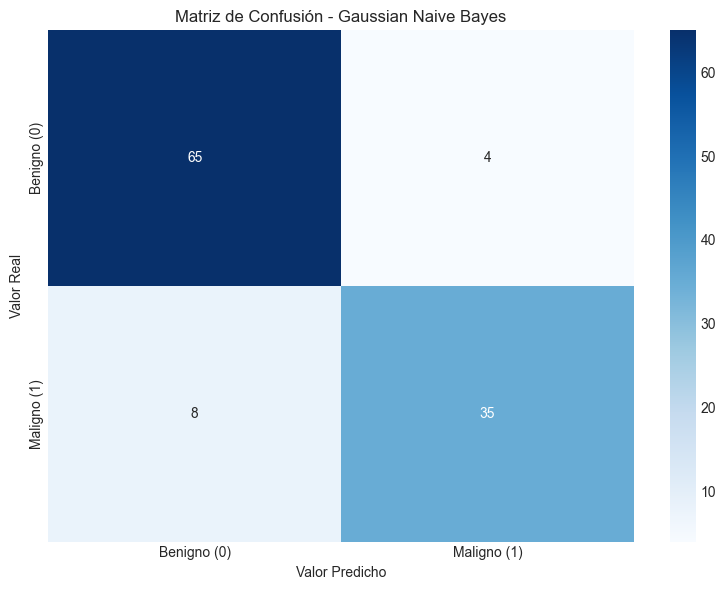

Datos de las predicciones
------------------------------------------------------------
Primeras 10 filas del DataFrame de predicciones:
         id  texture_mean  smoothness_mean  compactness_mean  concavity_mean  \
0 -0.174955      0.341785         1.461053          0.498548        0.716968   
1 -0.175293     -1.201872        -0.203597         -1.273097       -1.125857   
2 -0.177666      1.331610         0.697518          3.057717        3.060914   
3 -0.239028     -1.512960        -0.488842         -0.578547       -0.616096   
4 -0.238956     -1.072252         0.286938         -0.917361       -0.846964   
5 -0.238931     -0.791801        -1.139287         -0.630263       -0.660430   
6 -0.176877      0.047194        -1.596688         -0.635967       -0.495939   
7 -0.238536      2.276658        -1.108313         -0.901961       -0.364320   
8  0.422153     -1.159451         0.265329          0.515659        1.349242   
9  0.479454     -0.044718        -0.321729         -0.374726    

In [77]:
# Entrenar el modelo
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

# Hacer predicciones
Y_pred = gaussian.predict(X_test)

print("=" * 60)
print("Resultados del modelo Naive Bayes con clasificador gausiano")
print("=" * 60)

# Score

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred, average='binary')
recall = recall_score(y_test, Y_pred, average='binary')
f1 = f1_score(y_test, Y_pred, average='binary')

print('Accuracy (Exactitud):  %.3f' % accuracy)
print('Precision (Precisión): %.3f' % precision)
print('Recall (Sensibilidad): %.3f' % recall)
print('F1-Score:              %.3f' % f1)
print("")
print('Matriz de Confusión (valores numéricos):')
print(cm)

# Matriz de confusión
print("Matriz de confusión")
print("-" * 60)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benigno (0)', 'Maligno (1)'],
            yticklabels=['Benigno (0)', 'Maligno (1)'])
plt.title('Matriz de Confusión - Gaussian Naive Bayes')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.tight_layout()
plt.show()

# Datos de predicciones
print("Datos de las predicciones")
print("-" * 60)

# Obtener los índices del conjunto de test
indices_test = X_test.index if hasattr(X_test, 'index') else range(len(X_test))

# Crear DataFrame con los datos de test
# Si X_test es un array numpy, convertirlo a DataFrame
if isinstance(X_test, np.ndarray):
    # Necesitamos los nombres de columnas originales
    # Asumiendo que X_scaled_df tiene los nombres
    predicciones = pd.DataFrame(X_test, columns=X.columns)
else:
    predicciones = X_test.copy()

# Añadir la columna de diagnosis real
predicciones['diagnosis_real'] = y_test.values if hasattr(y_test, 'values') else y_test

# Añadir la columna de predicción
predicciones['prediccion'] = Y_pred

# Añadir la columna de acierto (1 si coincide, 0 si no)
predicciones['acierto'] = (predicciones['diagnosis_real'] == predicciones['prediccion']).astype(int)

# Mostrar las primeras filas
print("Primeras 10 filas del DataFrame de predicciones:")
print(predicciones.head(10))

print("Últimas columnas del DataFrame:")
print(predicciones[['diagnosis_real', 'prediccion', 'acierto']].head(10))

# Resumen de aciertos
total_aciertos = predicciones['acierto'].sum()
total_predicciones = len(predicciones)
porcentaje_aciertos = (total_aciertos / total_predicciones) * 100

print("\n" + "=" * 60)
print("Resumen de predicciones")
print("=" * 60)
print("Total de predicciones:     " + str(total_predicciones))
print("Predicciones correctas:    " + str(total_aciertos))
print("Predicciones incorrectas:  " + str(total_predicciones - total_aciertos))
print("Porcentaje de aciertos:    " + str(round(porcentaje_aciertos, 2)) + "%")
print("=" * 60)

### Tarea 6:  Guarda la predicción en un fichero csv 

Guarda el dataframe predicciones en tu disco local, con el nombre predicciones_nombre_apellido1_apellido2.csv.

In [78]:
predicciones.to_csv("predicciones_Alejandro_Beiroa_Muñoz.csv", index=False)

In [ ]:
#solo ejecutar en google colab
from google.colab import files 
predicciones.to_csv('predicciones_Alejandro_Beiroa_Muñoz.csv') 
files.download('predicciones_Alejandro_Beiroa_Muñoz.csv')